In [1]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.make_circles(n_samples=100)[0] + 5 * datasets.make_circles(n_samples=100)[0]

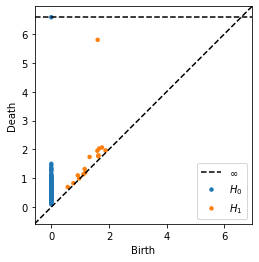

In [3]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

(4,)

In [17]:
ripser(data)['dgms']

[array([[0.        , 0.05297725],
        [0.        , 0.07165359],
        [0.        , 0.12710379],
        [0.        , 0.13414124],
        [0.        , 0.14731948],
        [0.        , 0.15708271],
        [0.        , 0.19439095],
        [0.        , 0.19572408],
        [0.        , 0.23156819],
        [0.        , 0.23246685],
        [0.        , 0.2378366 ],
        [0.        , 0.24722876],
        [0.        , 0.26920286],
        [0.        , 0.28129655],
        [0.        , 0.28163636],
        [0.        , 0.30355868],
        [0.        , 0.31329703],
        [0.        , 0.31869173],
        [0.        , 0.33228716],
        [0.        , 0.34357947],
        [0.        , 0.36686715],
        [0.        , 0.37735084],
        [0.        , 0.39663103],
        [0.        , 0.39797992],
        [0.        , 0.41081518],
        [0.        , 0.4224734 ],
        [0.        , 0.42288294],
        [0.        , 0.43076095],
        [0.        , 0.4491581 ],
        [0.   

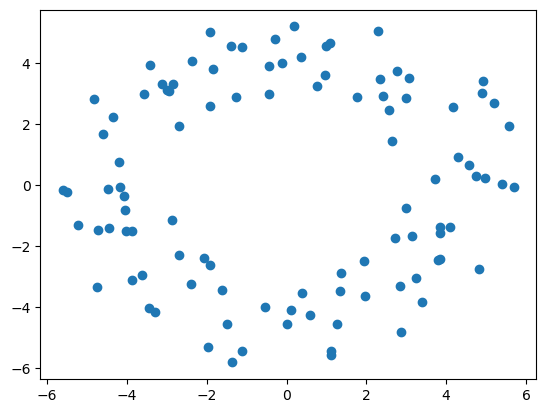

In [16]:
plt.scatter(data.T[0],data.T[1])
plt.show()

In [48]:
ripser_output = np.array(ripser(data,maxdim=2)['dgms'],dtype=object)

In [49]:
ripser_output.shape

(3,)

In [51]:
barcodes = list(zip(ripser_output[1]))

In [52]:
barcodes

[(array([1.76342142, 1.86840475]),),
 (array([1.6518631 , 1.92144454]),),
 (array([1.60310137, 5.60277796]),),
 (array([1.43175089, 1.49057055]),),
 (array([1.38128769, 1.70087326]),),
 (array([1.12332821, 1.19340551]),),
 (array([1.10733795, 1.39838064]),),
 (array([1.08455646, 1.41499257]),),
 (array([1.08183444, 1.41528189]),),
 (array([1.07177949, 1.10171175]),),
 (array([1.06459463, 1.09247434]),),
 (array([1.02174151, 1.02855468]),),
 (array([0.65706652, 0.86620253]),)]

In [55]:
ripser_output[1]

array([[1.76342142, 1.86840475],
       [1.6518631 , 1.92144454],
       [1.60310137, 5.60277796],
       [1.43175089, 1.49057055],
       [1.38128769, 1.70087326],
       [1.12332821, 1.19340551],
       [1.10733795, 1.39838064],
       [1.08455646, 1.41499257],
       [1.08183444, 1.41528189],
       [1.07177949, 1.10171175],
       [1.06459463, 1.09247434],
       [1.02174151, 1.02855468],
       [0.65706652, 0.86620253]])

In [4]:


feature_intervals = dict()
min_persistence = 0.5
max_dim = 2

for dim in range(max_dim,0,-1):
    features = ripser_output[dim]
    persistent_features = []
    
    if len(features)>0:
        for interval in features:
            #Death of feature - Birth of Feature
            persistence = abs(interval[1] - interval[0])
            print(persistence)
            if persistence > min_persistence:
                #If the feature persists then we'll keep track of it
                persistent_features.append(interval)
    feature_intervals[dim] = persistent_features

NameError: name 'ripser_output' is not defined

In [2]:
def feature_selection(data,max_dim,min_persistence):
    """This function will compute the persistence barcode of a point cloud using Ripser, and plot the diagram.

This function uses scikit-tda's ripser.py: a lean persistent homology package for Python.

Note:
    max_dim: specifies the maximum dimension of homology to be computed
    data: txt file or numpy array
    
     This will be done by selecting the betti numbers that persist longer than the threshold
        Then radii can be selected that preserve homology for each successive dimension. 
    """

#     if type(vertices)==str:
#         with open(vertices) as f:
#             np.loadtxt(f, delimiter=delim)


    barcodes = np.array(ripser(data,maxdim=max_dim)['dgms'],dtype=object)
    #plot barcode


    features = dict()

    for dim in range(max_dim,0,-1):
        barcode = barcodes[dim]
        persistent_features = []

        if len(features)>0:
            for interval in barcode:
                persistence = abs(interval[1] - interval[0]) #Death of feature - Birth of Feature
                #Save features that persist longer than min_persistence
                if persistence > min_persistence:
                    persistent_features.append(interval)
        
        #Ensure intervals are sorted by their lower bounds
        persistent_features.sort(key=lambda x:x[0])
        features[dim] = persistent_features
        
    return features

In [107]:
features = feature_selection(data=data,max_dim=2,min_persistence=0.3)
#features[1]
features

{2: [],
 1: [array([1.32939112, 1.73892856]),
  array([1.59661341, 1.95280457]),
  array([1.60848558, 5.80093002]),
  array([1.65686929, 2.0295794 ]),
  array([1.75887752, 2.06774783])]}

In [153]:
def interval_intersection(array:list,flag=False):
    if len(array) == 1:
        return array[0],flag
    else:
        #Sort by lower bound
        array.sort(key=lambda x:x[0])
        
        A = array[0]
        B = array[1]
       
        #Check for intersection?
        if min(B) <= max(A):
            array[1] = np.array([min(B),min(max(A),max(B))]) 
            print(f'Intersection, new interval: {array[1]}')
            flag=True
        else:
            print('No intersection')
            if flag:
                #If there has been previous intersection then have this interval propapgate
                array[1] = A
        #Recursive Call
        return interval_intersection(array[1:],flag)
        
    
    
    

In [154]:
#Testing
test = list([np.array([2,4]),np.array([6,7])])

interval_intersection(test)

No intersection


(array([6, 7]), False)

In [155]:
features[1]

[array([0.57076627, 0.69632018]),
 array([0.76549393, 0.82692897]),
 array([0.91934031, 1.09779227]),
 array([1.15792251, 1.32050824]),
 array([1.32939112, 1.73892856]),
 array([1.59661341, 1.95280457]),
 array([1.60848558, 5.80093002]),
 array([1.62732756, 1.7663691 ]),
 array([1.63913977, 1.79367816]),
 array([1.65686929, 2.0295794 ]),
 array([1.75887752, 2.06774783]),
 array([1.88078833, 1.96494329]),
 array([3., 6.])]

In [156]:
interval_intersection(features[1])

No intersection
No intersection
No intersection
No intersection
Intersection, new interval: [1.59661341 1.73892856]
Intersection, new interval: [1.60848558 1.73892856]
Intersection, new interval: [1.62732756 1.73892856]
Intersection, new interval: [1.63913977 1.73892856]
Intersection, new interval: [1.65686929 1.73892856]
No intersection
No intersection
No intersection


(array([1.65686929, 1.73892856]), True)

In [161]:
features = feature_selection(data,max_dim,min_persistence=0.05)
features[2] = [np.array([1.9,2.0]),np.array([3,6.0])]

In [4]:
def candidate_intervals(filtered_pd:dict):
    #Just for dim 2 since we are only concerned with cycles
    dim = max(filtered_pd.keys())
    print(dim)
    #Get Max Nontrivial Dimension Recursively
    if len(filtered_pd[dim]) ==0 : #Trivial Barcode
        filtered_pd.pop(dim)
        print(f'Trimmed dictionary: {filtered_pd}')
        return candidate_intervals(filtered_pd)

    #make sure intervals are sorted  
    print(f'Im printing my persistence dictionary: {filtered_pd}')

    cap,flag = interval_intersection(filtered_pd[dim])
    print(f"The intersection is: {cap}")
    #Have dimensions collapsed?
    if dim == 1:
        print('Dimension is 1')
        #Is there nontrivial intersection
        print(filtered_pd[dim][-1])
        if flag:
            print('About to return, should not recurse farther')
            return cap
            #returns list of all non-trivial homology intervals
            
        else:
            return filtered_pd[dim]

    #dim 2 or greater
    if flag:
        print('No intersection confirmed, should procceed to next dimension')
        #Proceed element wise down to next dimension
            #Add all intervals to lower dimension
        for interval in filtered_pd[dim]:
            filtered_pd[dim-1].append(interval)
    else:
        filtered_pd[dim-1].append(cap)
    #Remove current dimension and proceed to next, recursively
    filtered_pd.pop(dim)
    print(f'Trimmed pd: {filtered_pd}')

    return candidate_intervals(filtered_pd)
            

In [164]:
candidate_intervals(features)

2
Im printing my persistence dictionary: {2: [array([1.9, 2. ]), array([3., 6.])], 1: [array([0.57076627, 0.69632018]), array([0.76549393, 0.82692897]), array([0.91934031, 1.09779227]), array([1.15792251, 1.32050824]), array([1.32939112, 1.73892856]), array([1.59661341, 1.95280457]), array([1.60848558, 5.80093002]), array([1.62732756, 1.7663691 ]), array([1.63913977, 1.79367816]), array([1.65686929, 2.0295794 ]), array([1.75887752, 2.06774783]), array([1.88078833, 1.96494329])]}
No intersection
The intersection is: [3. 6.]
Trimmed pd: {1: [array([0.57076627, 0.69632018]), array([0.76549393, 0.82692897]), array([0.91934031, 1.09779227]), array([1.15792251, 1.32050824]), array([1.32939112, 1.73892856]), array([1.59661341, 1.95280457]), array([1.60848558, 5.80093002]), array([1.62732756, 1.7663691 ]), array([1.63913977, 1.79367816]), array([1.65686929, 2.0295794 ]), array([1.75887752, 2.06774783]), array([1.88078833, 1.96494329]), array([3., 6.])]}
1
Im printing my persistence dictionary:

array([1.65686929, 1.73892856])

In [32]:
np.sort(np.array([[1,2],[3,6],[2,5]]))

array([[1, 2],
       [3, 6],
       [2, 5]])

In [40]:
np.sort([2,1])

array([1, 2])

In [60]:
[1,2] >= [1,4]

False

In [30]:
features[1]

[array([1.49610591, 5.92466354]), array([1.15251732, 1.36400008])]

In [38]:
a = .sort(key=lambda y: y[1])

In [40]:
test = list(features[1])

In [42]:
test.sort(key=lambda x:x[0])

In [43]:
test

[array([1.15251732, 1.36400008]), array([1.49610591, 5.92466354])]

In [44]:
len([])

0

In [150]:
a = {'a':10,'b':11}

In [148]:
a.pop('a')

10

TypeError: unhashable type: 'slice'

In [181]:
np.median([1,2])

1.5

In [94]:
test = features[1]

In [96]:
sorted(test,key=lambda x:x[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [97]:
test

[array([0.57076627, 0.69632018]),
 array([0.76549393, 0.82692897]),
 array([0.91934031, 1.09779227]),
 array([1.15792251, 1.32050824]),
 array([1.32939112, 1.73892856]),
 array([1.59661341, 1.95280457]),
 array([1.60848558, 5.80093002]),
 array([1.62732756, 1.7663691 ]),
 array([1.63913977, 1.79367816]),
 array([1.65686929, 2.0295794 ]),
 array([1.75887752, 2.06774783]),
 array([1.88078833, 1.96494329]),
 [array([1.9, 2. ])]]

# Tested Functions

In [185]:
def feature_selection(data,max_dim,min_persistence):
    """This function will compute the persistence barcode of a point cloud using Ripser, and plot the diagram.

This function uses scikit-tda's ripser.py: a lean persistent homology package for Python.

Note:
    max_dim: specifies the maximum dimension of homology to be computed
    data: txt file or numpy array
    
     This will be done by selecting the betti numbers that persist longer than the threshold
        Then radii can be selected that preserve homology for each successive dimension. 
    """

#     if type(vertices)==str:
#         with open(vertices) as f:
#             np.loadtxt(f, delimiter=delim)



    #Generate Persistence Diagram for Point Cloud and Visualize
    dgms = ripser(data,maxdim=max_dim)['dgms']
    plot_diagrams(dgms, show=True)

    
    #Convert to Numpy
    barcodes = np.array(dgms,dtype=object)
    features = dict()

    for dim in range(max_dim,0,-1):
        barcode = barcodes[dim]
        persistent_features = []

        if len(features)>0:
            for interval in barcode:
                persistence = abs(interval[1] - interval[0]) #Death of feature - Birth of Feature
                #Save features that persist longer than min_persistence
                if persistence > min_persistence:
                    persistent_features.append(interval)
        
        #Ensure intervals are sorted by their lower bounds
        persistent_features.sort(key=lambda x:x[0])
        features[dim] = persistent_features
        
    return features
            
def interval_intersection(array:list,flag=False):
    if len(array) == 1:
        return array[0],flag
    else:
        #Sort by lower bound
        array.sort(key=lambda x:x[0])
        
        A = array[0]
        B = array[1]
       
        #Check for intersection?
        if min(B) <= max(A):
            array[1] = np.array([min(B),min(max(A),max(B))]) 
            print(f'Intersection, new interval: {array[1]}')
            flag=True
        else:
            print('No intersection')
            if flag:
                #If there has been previous intersection then have this interval propapgate
                array[1] = A
        #Recursive Call
        return interval_intersection(array[1:],flag)
        

def candidate_intervals(filtered_pd:dict):
    #Just for dim 2 since we are only concerned with cycles
    dim = max(filtered_pd.keys())
    print(dim)
    #Get Max Nontrivial Dimension Recursively
    if len(filtered_pd[dim]) ==0 : #Trivial Barcode
        filtered_pd.pop(dim)
        print(f'Trimmed dictionary: {filtered_pd}')
        if len(filtered_pd) == 0:
            print('No candidate intervals found. Try increasing minimum persistence threshold')
            return None
        return candidate_intervals(filtered_pd)

    #make sure intervals are sorted  
    print(f'Im printing my persistence dictionary: {filtered_pd}')

    cap,flag = interval_intersection(filtered_pd[dim])
    print(f"The intersection is: {cap}")
    #Have dimensions collapsed?
    if dim == 1:
        print('Dimension is 1')
        #Is there nontrivial intersection
        print(filtered_pd[dim][-1])
        if flag:
            print('About to return, should not recurse farther')
            return cap
            #returns list of all non-trivial homology intervals
            
        else:
            return filtered_pd[dim]

    #dim 2 or greater
    if flag:
        print('No intersection confirmed, should procceed to next dimension')
        #Proceed element wise down to next dimension
            #Add all intervals to lower dimension
        for interval in filtered_pd[dim]:
            filtered_pd[dim-1].append(interval)
    else:
        filtered_pd[dim-1].append(cap)
    #Remove current dimension and proceed to next, recursively
    filtered_pd.pop(dim)
    print(f'Trimmed pd: {filtered_pd}')

    return candidate_intervals(filtered_pd)



def select_radii(data,max_dim,min_persistence):
    
    features = feature_selection(data,max_dim,min_persistence)
    candidates = candidate_intervals(features)
    
    #Take the median of each candidate interval
    return [np.mean(x) for x in candidates]
            

In [177]:
vertices = '../Data/sphere_points.txt'
with open(vertices) as f:
    data = np.loadtxt(f, delimiter=',')
    
data

array([[-0.96998971,  0.205808  ,  0.12947216],
       [-0.31768639,  0.90976139,  0.26722568],
       [ 0.96575295,  0.15691368, -0.20663819],
       ...,
       [-0.68152027,  0.53782273, -0.49626286],
       [ 0.39833095,  0.90794496,  0.13026283],
       [-0.56400921,  0.49564592,  0.66047614]])

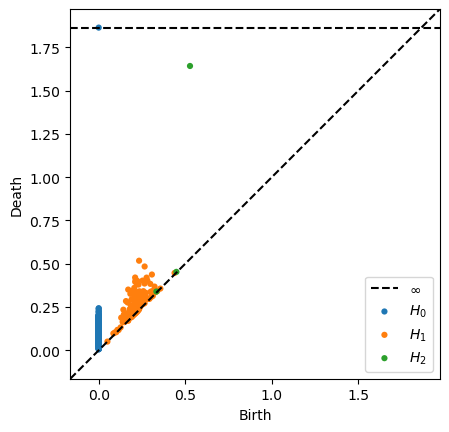

2
Trimmed dictionary: {1: [array([0.13005643, 0.18831174]), array([0.14263815, 0.23455934]), array([0.14549866, 0.20632273]), array([0.14794572, 0.20618224]), array([0.15760303, 0.28437123]), array([0.16691206, 0.27632448]), array([0.17046714, 0.35080749]), array([0.17979462, 0.23838797]), array([0.18289371, 0.32616496]), array([0.18499741, 0.26084769]), array([0.18721302, 0.34183678]), array([0.18968955, 0.29380199]), array([0.19699132, 0.29677421]), array([0.20173126, 0.34459835]), array([0.2019757 , 0.32655531]), array([0.20399989, 0.33282545]), array([0.20400783, 0.25446719]), array([0.20441139, 0.29324383]), array([0.20566651, 0.36061746]), array([0.20622595, 0.28445101]), array([0.21053369, 0.42050108]), array([0.21060634, 0.39592442]), array([0.21124706, 0.32411921]), array([0.21239986, 0.27500319]), array([0.21328367, 0.26976016]), array([0.21401632, 0.4072485 ]), array([0.21606705, 0.28615156]), array([0.21618207, 0.29799399]), array([0.21631297, 0.31348905]), array([0.2187607

[0.1872130185365677, 0.18831174075603485]

In [183]:
select_radii(data,max_dim,min_persistence=0.05)

In [179]:
dgms = ripser(data,maxdim=max_dim)['dgms']


In [182]:
np.array(dgms

<ipython-input-182-c1bb55526b3d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dgms).shape


(3,)